In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from numpy import linalg as LA
import csv
import pandas as pd
from skimage.feature import hog
from os import listdir
from os.path import isfile, join
from skimage.feature import hog

Số lượng ảnh trong thư mục Cercis chinensis: 72
Số lượng ảnh trong thư mục Indigofera tinctoria: 73
Số lượng ảnh trong thư mục Acer palmatum: 56


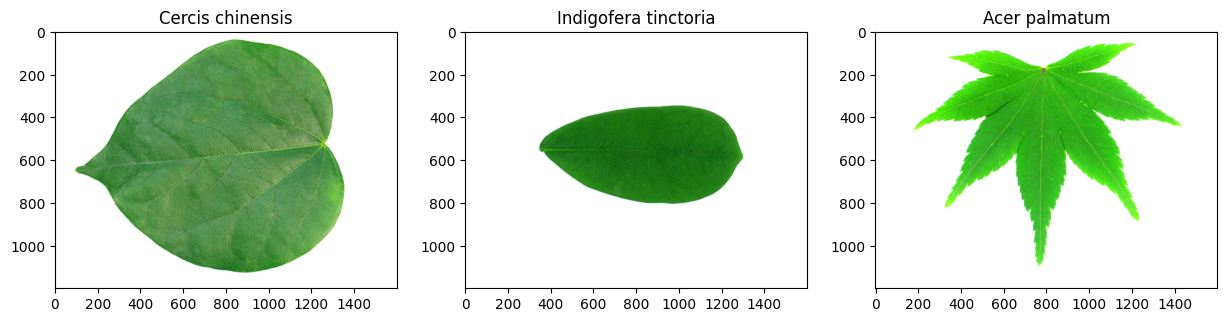

Kích thước ảnh Cercis chinensis: (1200, 1600, 3)
Kích thước ảnh Indigofera tinctoria: (1200, 1600, 3)
Kích thước ảnh Acer palmatum: (1200, 1600, 3)


In [2]:
cercis_chinesis = '../Leaf_nhom_02/4 Cercis chinensis/'
indigofera_tinctoria = '../Leaf_nhom_02/5 Indigofera tinctoria L/'
acer_palmatum = '../Leaf_nhom_02/6 Acer palmatum/'

# Hiển thị số lượng ảnh trong các thư mục
def count_images(path):
    import os
    list = os.listdir(path)
    return len(list)

print('Số lượng ảnh trong thư mục Cercis chinensis:', count_images(cercis_chinesis))
print('Số lượng ảnh trong thư mục Indigofera tinctoria:', count_images(indigofera_tinctoria))
print('Số lượng ảnh trong thư mục Acer palmatum:', count_images(acer_palmatum))

# Đọc ảnh trong folder
def read_images(path):
    import os
    list = os.listdir(path)
    images = []
    for i in list:
        images.append(plt.imread(path + i))
    return images

# Hiển thị ảnh đầu tiên của mỗi loại
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(read_images(cercis_chinesis)[0])
axs[0].set_title('Cercis chinensis')

axs[1].imshow(read_images(indigofera_tinctoria)[0])
axs[1].set_title('Indigofera tinctoria')

axs[2].imshow(read_images(acer_palmatum)[0])
axs[2].set_title('Acer palmatum')

plt.subplots_adjust(wspace=0.2)  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()

# Hiển thị kích thước 1 ảnh đầu tiên
print('Kích thước ảnh Cercis chinensis:', read_images(cercis_chinesis)[0].shape)
print('Kích thước ảnh Indigofera tinctoria:', read_images(indigofera_tinctoria)[0].shape)
print('Kích thước ảnh Acer palmatum:', read_images(acer_palmatum)[0].shape)

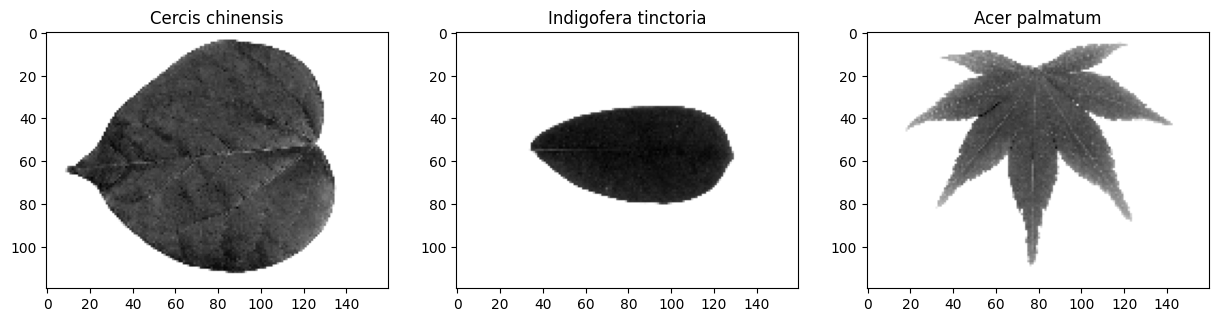

Kích thước ảnh Cercis chinensis sau khi tiền xử lý: (120, 160)
Kích thước ảnh Indigofera tinctoria sau khi tiền xử lý: (120, 160)
Kích thước ảnh Acer palmatum sau khi tiền xử lý: (120, 160)


In [16]:
# Đọc ảnh trong từng thư mục và chuyển sang ảnh xám, tạo vào lưu file ảnh xám vào folder mới
def preprocessing(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # resize ảnh với kích thước giảm 10 lần
    gray_img = cv2.resize(gray_img, (gray_img.shape[1]//10, gray_img.shape[0]//10))
    return gray_img

# Hiển thị ảnh sau khi tiền xử lý
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(preprocessing(read_images(cercis_chinesis)[0]), cmap='gray')
axs[0].set_title('Cercis chinensis')

axs[1].imshow(preprocessing(read_images(indigofera_tinctoria)[0]), cmap='gray')
axs[1].set_title('Indigofera tinctoria')

axs[2].imshow(preprocessing(read_images(acer_palmatum)[0]), cmap='gray')
axs[2].set_title('Acer palmatum')

plt.subplots_adjust(wspace=0.2)  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()

print('Kích thước ảnh Cercis chinensis sau khi tiền xử lý:', preprocessing(read_images(cercis_chinesis)[0]).shape)
print('Kích thước ảnh Indigofera tinctoria sau khi tiền xử lý:', preprocessing(read_images(indigofera_tinctoria)[0]).shape)
print('Kích thước ảnh Acer palmatum sau khi tiền xử lý:', preprocessing(read_images(acer_palmatum)[0]).shape)



In [17]:
cercis_chinesis_img = read_images(cercis_chinesis)
indigofera_tinctoria_img = read_images(indigofera_tinctoria)
acer_palmatum_img = read_images(acer_palmatum)

# Tiền xử lý ảnh và lưu vào thư mục mới với tên giống ảnh gốc
cercis_chinesis_preprocessing = '../HOG_nhom_02/preprocessing/cercis_chinesis_preprocess/'
indigofera_tinctoria_preprocessing = '../HOG_nhom_02/preprocessing/indigofera_tinctoria_preprocess/'
acer_palmatum_preprocessing = '../HOG_nhom_02/preprocessing/acer_palmatum_preprocess/'

if not os.path.exists(cercis_chinesis_preprocessing):
    os.makedirs(cercis_chinesis_preprocessing)
if not os.path.exists(indigofera_tinctoria_preprocessing):
    os.makedirs(indigofera_tinctoria_preprocessing)
if not os.path.exists(acer_palmatum_preprocessing):
    os.makedirs(acer_palmatum_preprocessing)

for i in range(len(cercis_chinesis_img)):
    cv2.imwrite(cercis_chinesis_preprocessing + 'cercis_chinesis_' + str(i) + '.jpg', preprocessing(cercis_chinesis_img[i]))
for i in range(len(indigofera_tinctoria_img)):
    cv2.imwrite(indigofera_tinctoria_preprocessing + 'indigofera_tinctoria_' + str(i) + '.jpg', preprocessing(indigofera_tinctoria_img[i]))
for i in range(len(acer_palmatum_img)):
    cv2.imwrite(acer_palmatum_preprocessing + 'acer_palmatum_' + str(i) + '.jpg', preprocessing(acer_palmatum_img[i]))


In [18]:
# Trích đặc trưng HOG của ảnh và lưu vào file csv
# Gán nhãn cho đặc trưng
# Cercis chinensis: 4
# Indigofera tinctoria: 5
# Acer palmatum: 6

def hog_feature(image):
    feature, hog_image = hog(image, 
                             orientations=9, 
                             pixels_per_cell=(8, 8), 
                             cells_per_block=(2, 2),
                             block_norm='L2-Hys',
                             visualize=True,
                             transform_sqrt=True)
    return feature



def extract_feature_from_folder(path, label):
    list = os.listdir(path)
    features = []
    labels = []
    for i in list:
        img = plt.imread(path + i)
        features.append(hog_feature(img))
        labels.append(label)
    return features, labels

def save_to_csv(features, labels, file_name):
    df = pd.DataFrame(features)
    df['label'] = labels
    df.to_csv(file_name, index=False)

cercis_chinesis_features, cercis_chinesis_labels = extract_feature_from_folder(cercis_chinesis_preprocessing, 4)
indigofera_tinctoria_features, indigofera_tinctoria_labels = extract_feature_from_folder(indigofera_tinctoria_preprocessing, 5)
acer_palmatum_features, acer_palmatum_labels = extract_feature_from_folder(acer_palmatum_preprocessing, 6)

features = cercis_chinesis_features + indigofera_tinctoria_features + acer_palmatum_features
labels = cercis_chinesis_labels + indigofera_tinctoria_labels + acer_palmatum_labels

save_to_csv(features, labels, 'HOG_nhom_02.csv')

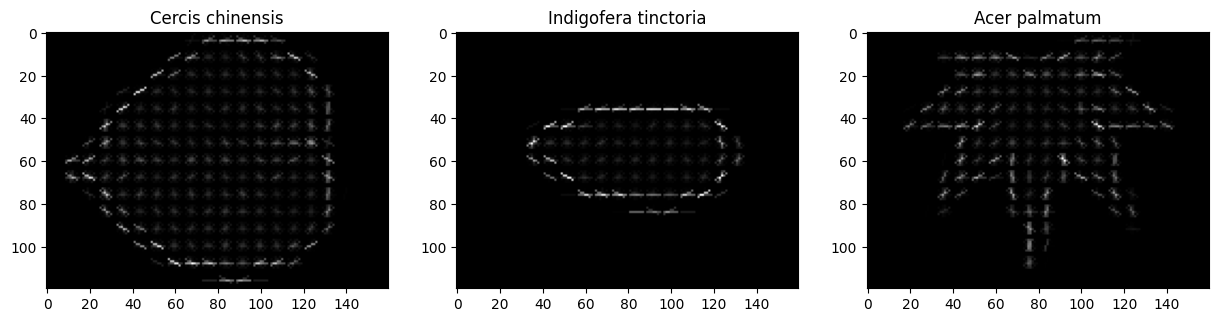

In [16]:
def hog_feature(image):
    feature, hog_image = hog(image, 
                             orientations=9, 
                             pixels_per_cell=(8, 8), 
                             cells_per_block=(2, 2),
                             block_norm='L2-Hys',
                             visualize=True,
                             transform_sqrt=True)
    return feature

def show_hog_image(image):
    feature, hog_image = hog(image, 
                             orientations=9, 
                             pixels_per_cell=(8, 8), 
                             cells_per_block=(2, 2),
                             block_norm='L2-Hys',
                             visualize=True,
                             transform_sqrt=True)
    return hog_image

# Hiển thị ảnh HOG trong từng loại từ folder preprocessing
cercis_chinesis = plt.imread('./preprocessing/cercis_chinesis_preprocess/cercis_chinesis_0.jpg')
indigofera_tinctoria = plt.imread('./preprocessing/indigofera_tinctoria_preprocess/indigofera_tinctoria_0.jpg')
acer_palmatum = plt.imread('./preprocessing/acer_palmatum_preprocess/acer_palmatum_0.jpg')
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(show_hog_image(cercis_chinesis), cmap='gray')
axs[0].set_title('Cercis chinensis')

axs[1].imshow(show_hog_image(indigofera_tinctoria), cmap='gray')
axs[1].set_title('Indigofera tinctoria')

axs[2].imshow(show_hog_image(acer_palmatum), cmap='gray')
axs[2].set_title('Acer palmatum')

plt.subplots_adjust(wspace=0.2)  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()
